## Problem 3

###Part a

In [1]:
pip install rpy2==3.5.1 # only run this if you have trouble running the rmagic in the cells below

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp39-cp39-linux_x86_64.whl size=317918 sha256=5ec147f53b4df462626cb636a4268220e5a5d4c4419e542d07af0ec3c8dcfd9f
  Stored in directory: /root/.cache/pip/wheels/09/e7/bc/33685b60ab54dba969596dd87244ee9f4c2e83dff9a53d4f20
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages("igraph")
library("igraph")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp52mnjN/downloaded_packages’

Attaching package: ‘igraph’



    decompose, spectrum



    union




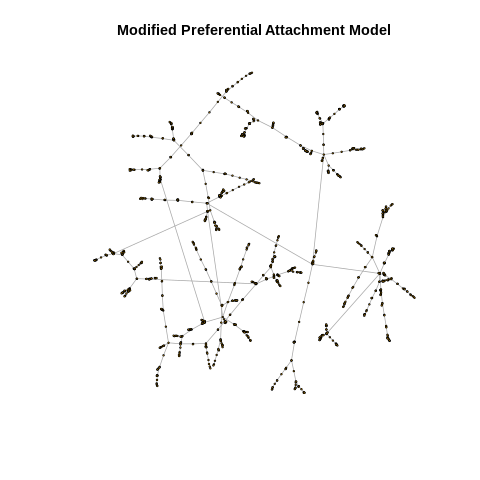

In [4]:
%%R # use this command to run R in the cell

nodes = 1050
mEdges = 1
alpha = 1
beta = -1
a=1 
c=1
d=1
b=0

g=sample_pa_age(n=nodes, 
                  m=mEdges, 
                  pa.exp = alpha, 
                  aging.exp = beta,
                  directed = FALSE,
                  zero.deg.appeal = a,
                  zero.age.appeal = b,
                  deg.coef = c,
                  age.coef = d
                  )

plot(g, main="Modified Preferential Attachment Model", vertex.size=1, vertex.label=NA)


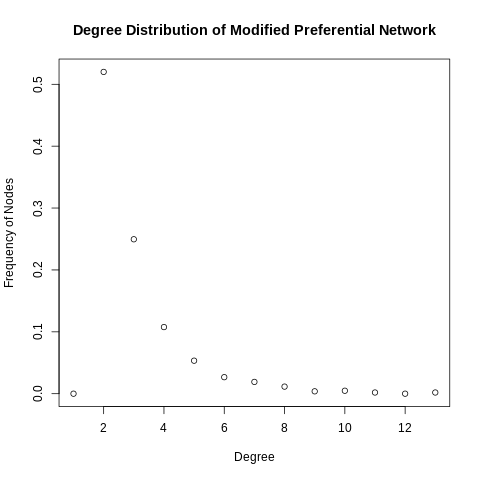

In [ ]:
## RUN IN R
%%R # use this command to run R in the cell

nodes = 1050
mEdges = 1
alpha = 1
beta = -1
a=1 
c=1
d=1
b=0

g=sample_pa_age(n=nodes, 
                  m=mEdges, 
                  pa.exp = alpha, 
                  aging.exp = beta,
                  directed = FALSE,
                  zero.deg.appeal = a,
                  zero.age.appeal = b,
                  deg.coef = c,
                  age.coef = d
                  )

# plot degree distribution
plot(degree.distribution(g), main="Degree Distribution of Modified Preferential Network", 
    xlab = "Degree", ylab = "Frequency of Nodes")
# what is the power law exponent



Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.081       -3.269  



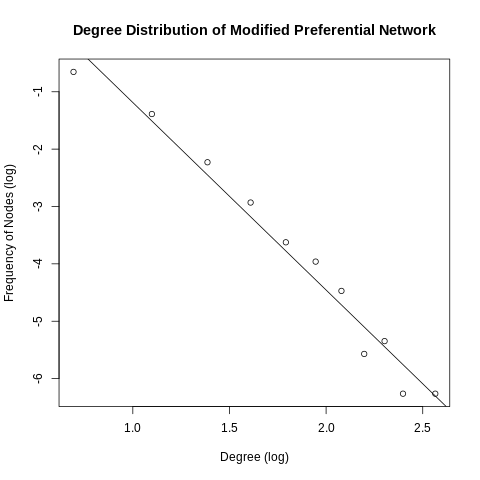

In [ ]:
%%R

remove0 = which(degree.distribution(g) !=0, arr.ind=TRUE)
# get x and y
x=log(seq(1:length(degree.distribution(g))))[remove0]
y=log(degree.distribution(g))[remove0]

# linear fit
linFit = lm(y~x)
print(linFit)

plot(x, y, abline(linFit), main="Degree Distribution of Modified Preferential Network", 
    xlab = "Degree (log)", ylab = "Frequency of Nodes (log)")


### Part b

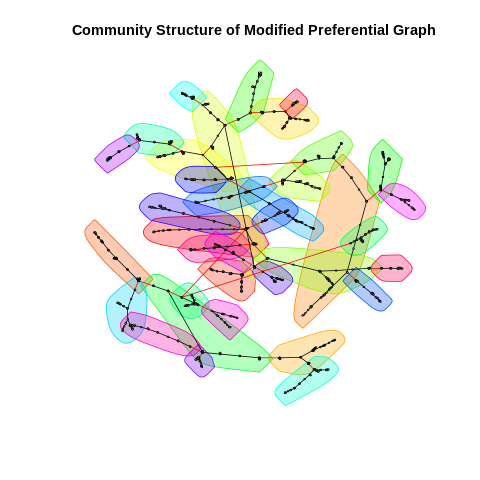

In [ ]:
%%R
# find the community structure (fast greedy)
fc <-cluster_fast_greedy(g)

# what is the modularity
modularity(fc)

plot(fc, g, main="Community Structure of Modified Preferential Graph", vertex.size=1, vertex.label=NA)